In [1]:
from tsnecuda import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import faiss

In [5]:
path = f'../feature/715e0fd6b800f553c2708368fdba6292.npz'
data = np.load(path)
sx, tlx, tux, sy, tly, tuy = [data[i] for i in ['sf', 'lf', 'uf', 'sy', 'ly', 'uy']]

In [6]:
ssy = np.zeros_like(sy)
ttly = np.ones_like(tly)
ttuy = 2*np.ones_like(tuy)
cx = np.r_[sx, tlx, tux]
cy = np.r_[ssy, ttly, ttuy]

In [8]:
cx_tsne = TSNE(n_components=2, perplexity=15, learning_rate=10, random_seed=1284).fit_transform(cx)

In [9]:
sx_tsne = cx_tsne[:sy.shape[0]]
tlx_tsne = cx_tsne[sy.shape[0]:sy.shape[0]+ttly.shape[0]]
tux_tsne = cx_tsne[sy.shape[0]+ttly.shape[0]:]
lx_tsne = cx_tsne[:sy.shape[0]+ttly.shape[0]]

In [6]:
sx62, sy62 = sx_tsne[sy==62], np.zeros((sy==62).sum())
sx63, sy63 = sx_tsne[sy==63], np.ones((sy==63).sum())
tx62, ty62 = tux_tsne[tuy==62], 2*np.ones((tuy==62).sum())
tx63, ty63 = tux_tsne[tuy==63], 3*np.ones((tuy==63).sum())

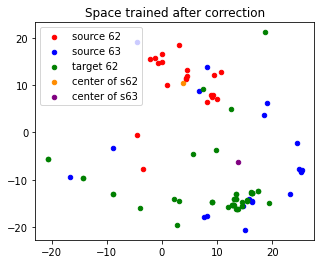

In [7]:
cmap = ListedColormap(['red', 'blue'])
fig, ax = plt.subplots(figsize=(5, 4))
s62 = ax.scatter(sx62[:, 0], sx62[:, 1], s=20, c='red')
s63 = ax.scatter(sx63[:, 0], sx63[:, 1], s=20, c='blue')
t62 = ax.scatter(tx62[:, 0], tx62[:, 1], s=20, c='green')
s62c = ax.scatter(*sx62.mean(axis=0), s=20, c='darkorange')
s63c = ax.scatter(*sx63.mean(axis=0), s=20, c='purple')
plt.legend([s62, s63, t62, s62c, s63c], ['source 62', 'source 63', 'target 62', 'center of s62', 'center of s63'])
plt.title('Space trained after correction')
plt.show()

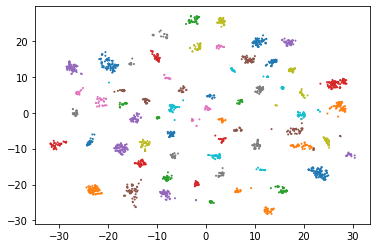

In [10]:
plt.scatter(sx_tsne[:, 0], sx_tsne[:, 1], s=1, c=sy, cmap='tab10')
plt.show()

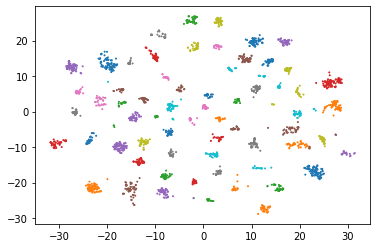

In [15]:
plt.scatter(lx_tsne[:, 0], lx_tsne[:, 1], s=1, c=np.r_[sy, tly], cmap='tab10')
plt.savefig('baseline')
plt.show()

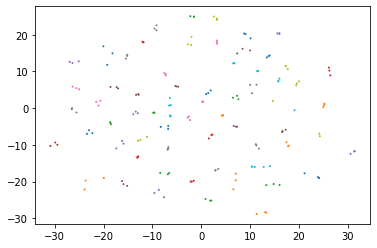

In [12]:
plt.scatter(tlx_tsne[:, 0], tlx_tsne[:, 1], s=1, c=tly, cmap='tab10')
plt.show()

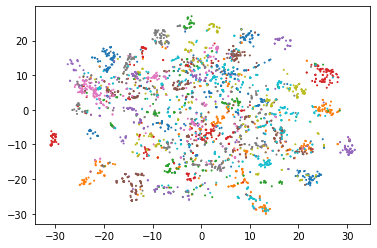

In [16]:
plt.scatter(tux_tsne[:, 0], tux_tsne[:, 1], s=1, c=tuy, cmap='tab10')
plt.show()

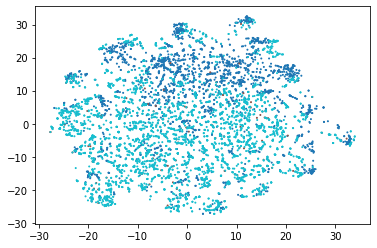

In [12]:
plt.scatter(cx_tsne[:, 0], cx_tsne[:, 1], s=1, c=cy, cmap='tab10')